In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 128.", name="epoch 1000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
1/5 [=====>........................] - ETA: 6s - loss: 1.3146 - mae: 1.0715

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 6s 1s/step - loss: 1.2980 - mae: 1.0561 - val_loss: 0.9381 - val_mae: 0.8819
Epoch 2/1000
3/5 [=================>............] - ETA: 0s - loss: 0.8285 - mae: 0.8100

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 977ms/step - loss: 0.6993 - mae: 0.7185 - val_loss: 0.3100 - val_mae: 0.4441
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 0.3025 - mae: 0.4452

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.3025 - mae: 0.4452 - val_loss: 0.1967 - val_mae: 0.3633
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 0.1737 - mae: 0.3438

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.1737 - mae: 0.3438 - val_loss: 0.1769 - val_mae: 0.3487
Epoch 5/1000
5/5 [==============================] - ETA: 0s - loss: 0.1758 - mae: 0.3408

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.1758 - mae: 0.3408 - val_loss: 0.1667 - val_mae: 0.3372
Epoch 6/1000
5/5 [==============================] - ETA: 0s - loss: 0.1573 - mae: 0.3243

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.1573 - mae: 0.3243 - val_loss: 0.1410 - val_mae: 0.3111
Epoch 7/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1340 - mae: 0.2998

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 880ms/step - loss: 0.1325 - mae: 0.2990 - val_loss: 0.1133 - val_mae: 0.2768
Epoch 8/1000
5/5 [==============================] - ETA: 0s - loss: 0.1103 - mae: 0.2663

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.1103 - mae: 0.2663 - val_loss: 0.1035 - val_mae: 0.2615
Epoch 9/1000
5/5 [==============================] - ETA: 0s - loss: 0.0953 - mae: 0.2468

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 940ms/step - loss: 0.0953 - mae: 0.2468 - val_loss: 0.0886 - val_mae: 0.2433
Epoch 10/1000
5/5 [==============================] - ETA: 0s - loss: 0.0790 - mae: 0.2212

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.0790 - mae: 0.2212 - val_loss: 0.0625 - val_mae: 0.1928
Epoch 11/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0669 - mae: 0.2060 - val_loss: 0.0657 - val_mae: 0.1971
Epoch 12/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0678 - mae: 0.1985 - val_loss: 0.0681 - val_mae: 0.2109
Epoch 13/1000
5/5 [==============================] - ETA: 0s - loss: 0.0651 - mae: 0.2018

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 904ms/step - loss: 0.0651 - mae: 0.2018 - val_loss: 0.0608 - val_mae: 0.1899
Epoch 14/1000
5/5 [==============================] - ETA: 0s - loss: 0.0607 - mae: 0.1910

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0607 - mae: 0.1910 - val_loss: 0.0578 - val_mae: 0.1853
Epoch 15/1000
5/5 [==============================] - ETA: 0s - loss: 0.0586 - mae: 0.1856

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0586 - mae: 0.1856 - val_loss: 0.0573 - val_mae: 0.1847
Epoch 16/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0580 - mae: 0.1859 - val_loss: 0.0584 - val_mae: 0.1858
Epoch 17/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0590 - mae: 0.1854

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0579 - mae: 0.1846 - val_loss: 0.0567 - val_mae: 0.1834
Epoch 18/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0573 - mae: 0.1830 - val_loss: 0.0569 - val_mae: 0.1835
Epoch 19/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0567 - mae: 0.1826 - val_loss: 0.0582 - val_mae: 0.1842
Epoch 20/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0567 - mae: 0.1815 - val_loss: 0.0582 - val_mae: 0.1875
Epoch 21/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0573 - mae: 0.1834 - val_loss: 0.0611 - val_mae: 0.1879
Epoch 22/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0585 - mae: 0.1855 - val_loss: 0.0571 - val_mae: 0.1825
Epoch 23/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0566 - mae: 0.1809 - val_loss: 0.0571 - val_mae: 0.1840
Epoch 24/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0563 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 889ms/step - loss: 0.0574 - mae: 0.1829 - val_loss: 0.0565 - val_mae: 0.1818
Epoch 27/1000
5/5 [==============================] - 0s 60ms/step - loss: 0.0565 - mae: 0.1807 - val_loss: 0.0569 - val_mae: 0.1834
Epoch 28/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0565 - mae: 0.1816 - val_loss: 0.0567 - val_mae: 0.1816
Epoch 29/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0571 - mae: 0.1835 - val_loss: 0.0594 - val_mae: 0.1852
Epoch 30/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0616 - mae: 0.1886

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0572 - mae: 0.1826 - val_loss: 0.0563 - val_mae: 0.1815
Epoch 31/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0537 - mae: 0.1771

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0561 - mae: 0.1802 - val_loss: 0.0563 - val_mae: 0.1817
Epoch 32/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0561 - mae: 0.1807 - val_loss: 0.0568 - val_mae: 0.1834
Epoch 33/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0562 - mae: 0.1811 - val_loss: 0.0572 - val_mae: 0.1835
Epoch 34/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0562 - mae: 0.1808 - val_loss: 0.0574 - val_mae: 0.1824
Epoch 35/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0560 - mae: 0.1805 - val_loss: 0.0565 - val_mae: 0.1813
Epoch 36/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0565 - mae: 0.1816 - val_loss: 0.0568 - val_mae: 0.1838
Epoch 37/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0561 - mae: 0.1807 - val_loss: 0.0567 - val_mae: 0.1825
Epoch 38/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0561 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 872ms/step - loss: 0.0554 - mae: 0.1792 - val_loss: 0.0560 - val_mae: 0.1802
Epoch 46/1000
5/5 [==============================] - 0s 58ms/step - loss: 0.0552 - mae: 0.1787 - val_loss: 0.0561 - val_mae: 0.1813
Epoch 47/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0557 - mae: 0.1800 - val_loss: 0.0567 - val_mae: 0.1822
Epoch 48/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0553 - mae: 0.1793 - val_loss: 0.0569 - val_mae: 0.1814
Epoch 49/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0554 - mae: 0.1794 - val_loss: 0.0562 - val_mae: 0.1808
Epoch 50/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0553 - mae: 0.1793 - val_loss: 0.0570 - val_mae: 0.1819
Epoch 51/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0550 - mae: 0.1789 - val_loss: 0.0569 - val_mae: 0.1828
Epoch 52/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0560 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 836ms/step - loss: 0.0565 - mae: 0.1829 - val_loss: 0.0557 - val_mae: 0.1801
Epoch 56/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0561 - mae: 0.1819 - val_loss: 0.0576 - val_mae: 0.1821
Epoch 57/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0555 - mae: 0.1798 - val_loss: 0.0570 - val_mae: 0.1817
Epoch 58/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0550 - mae: 0.1787 - val_loss: 0.0573 - val_mae: 0.1838
Epoch 59/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0554 - mae: 0.1803 - val_loss: 0.0568 - val_mae: 0.1836
Epoch 60/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0556 - mae: 0.1808 - val_loss: 0.0559 - val_mae: 0.1802
Epoch 61/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0548 - mae: 0.1786 - val_loss: 0.0597 - val_mae: 0.1855
Epoch 62/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0557 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 876ms/step - loss: 0.0560 - mae: 0.1818 - val_loss: 0.0554 - val_mae: 0.1793
Epoch 71/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0553 - mae: 0.1803 - val_loss: 0.0563 - val_mae: 0.1809
Epoch 72/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0546 - mae: 0.1785 - val_loss: 0.0566 - val_mae: 0.1820
Epoch 73/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0545 - mae: 0.1782 - val_loss: 0.0557 - val_mae: 0.1807
Epoch 74/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0545 - mae: 0.1782 - val_loss: 0.0558 - val_mae: 0.1807
Epoch 75/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0546 - mae: 0.1782 - val_loss: 0.0560 - val_mae: 0.1813
Epoch 76/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0543 - mae: 0.1779 - val_loss: 0.0566 - val_mae: 0.1805
Epoch 77/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0541 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 864ms/step - loss: 0.0530 - mae: 0.1759 - val_loss: 0.0548 - val_mae: 0.1792
Epoch 90/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0529 - mae: 0.1755 - val_loss: 0.0560 - val_mae: 0.1826
Epoch 91/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0538 - mae: 0.1780 - val_loss: 0.0554 - val_mae: 0.1792
Epoch 92/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0533 - mae: 0.1767 - val_loss: 0.0589 - val_mae: 0.1833
Epoch 93/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0546 - mae: 0.1803 - val_loss: 0.0613 - val_mae: 0.1880
Epoch 94/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0550 - mae: 0.1799 - val_loss: 0.0553 - val_mae: 0.1789
Epoch 95/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0483 - mae: 0.1654

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0530 - mae: 0.1759 - val_loss: 0.0545 - val_mae: 0.1786
Epoch 96/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0522 - mae: 0.1739 - val_loss: 0.0580 - val_mae: 0.1889
Epoch 97/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0544 - mae: 0.1787 - val_loss: 0.0557 - val_mae: 0.1822
Epoch 98/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0537 - mae: 0.1778 - val_loss: 0.0546 - val_mae: 0.1777
Epoch 99/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0520 - mae: 0.1740 - val_loss: 0.0545 - val_mae: 0.1779
Epoch 100/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0517 - mae: 0.1742 - val_loss: 0.0574 - val_mae: 0.1811
Epoch 101/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0577 - mae: 0.1829

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 889ms/step - loss: 0.0530 - mae: 0.1760 - val_loss: 0.0545 - val_mae: 0.1774
Epoch 102/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0526 - mae: 0.1756 - val_loss: 0.0555 - val_mae: 0.1825
Epoch 103/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.0533 - mae: 0.1772 - val_loss: 0.0558 - val_mae: 0.1832
Epoch 104/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0532 - mae: 0.1760 - val_loss: 0.0564 - val_mae: 0.1863
Epoch 105/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0505 - mae: 0.1732

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 911ms/step - loss: 0.0543 - mae: 0.1809 - val_loss: 0.0534 - val_mae: 0.1766
Epoch 106/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0524 - mae: 0.1763 - val_loss: 0.0558 - val_mae: 0.1798
Epoch 107/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0516 - mae: 0.1741 - val_loss: 0.0542 - val_mae: 0.1769
Epoch 108/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0515 - mae: 0.1735 - val_loss: 0.0536 - val_mae: 0.1764
Epoch 109/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0509 - mae: 0.1724 - val_loss: 0.0552 - val_mae: 0.1842
Epoch 110/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0518 - mae: 0.1745 - val_loss: 0.0550 - val_mae: 0.1844
Epoch 111/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0524 - mae: 0.1769

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 849ms/step - loss: 0.0507 - mae: 0.1737 - val_loss: 0.0530 - val_mae: 0.1761
Epoch 112/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0487 - mae: 0.1699 - val_loss: 0.0536 - val_mae: 0.1770
Epoch 113/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0496 - mae: 0.1711

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0496 - mae: 0.1710 - val_loss: 0.0521 - val_mae: 0.1768
Epoch 114/1000
5/5 [==============================] - ETA: 0s - loss: 0.0483 - mae: 0.1695

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 902ms/step - loss: 0.0483 - mae: 0.1695 - val_loss: 0.0513 - val_mae: 0.1765
Epoch 115/1000
5/5 [==============================] - 0s 79ms/step - loss: 0.0474 - mae: 0.1678 - val_loss: 0.0515 - val_mae: 0.1772
Epoch 116/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0468 - mae: 0.1661

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 913ms/step - loss: 0.0468 - mae: 0.1665 - val_loss: 0.0511 - val_mae: 0.1746
Epoch 117/1000
5/5 [==============================] - ETA: 0s - loss: 0.0469 - mae: 0.1666

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0469 - mae: 0.1666 - val_loss: 0.0505 - val_mae: 0.1730
Epoch 118/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0470 - mae: 0.1673 - val_loss: 0.0521 - val_mae: 0.1749
Epoch 119/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0466 - mae: 0.1668

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0469 - mae: 0.1674 - val_loss: 0.0495 - val_mae: 0.1722
Epoch 120/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0466 - mae: 0.1666

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 883ms/step - loss: 0.0465 - mae: 0.1663 - val_loss: 0.0490 - val_mae: 0.1720
Epoch 121/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0470 - mae: 0.1680 - val_loss: 0.0535 - val_mae: 0.1815
Epoch 122/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0475 - mae: 0.1684 - val_loss: 0.0507 - val_mae: 0.1744
Epoch 123/1000
5/5 [==============================] - ETA: 0s - loss: 0.0457 - mae: 0.1647

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 918ms/step - loss: 0.0457 - mae: 0.1647 - val_loss: 0.0486 - val_mae: 0.1700
Epoch 124/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0450 - mae: 0.1629 - val_loss: 0.0489 - val_mae: 0.1695
Epoch 125/1000
5/5 [==============================] - ETA: 0s - loss: 0.0452 - mae: 0.1631

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 905ms/step - loss: 0.0452 - mae: 0.1631 - val_loss: 0.0485 - val_mae: 0.1693
Epoch 126/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0458 - mae: 0.1639

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0445 - mae: 0.1623 - val_loss: 0.0478 - val_mae: 0.1690
Epoch 127/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0439 - mae: 0.1606 - val_loss: 0.0482 - val_mae: 0.1697
Epoch 128/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0438 - mae: 0.1606

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 902ms/step - loss: 0.0439 - mae: 0.1612 - val_loss: 0.0472 - val_mae: 0.1687
Epoch 129/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0435 - mae: 0.1609 - val_loss: 0.0473 - val_mae: 0.1687
Epoch 130/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0458 - mae: 0.1644

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0440 - mae: 0.1612 - val_loss: 0.0468 - val_mae: 0.1656
Epoch 131/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0432 - mae: 0.1594 - val_loss: 0.0469 - val_mae: 0.1671
Epoch 132/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0423 - mae: 0.1576

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 871ms/step - loss: 0.0430 - mae: 0.1589 - val_loss: 0.0463 - val_mae: 0.1654
Epoch 133/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0430 - mae: 0.1593 - val_loss: 0.0465 - val_mae: 0.1656
Epoch 134/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0428 - mae: 0.1593 - val_loss: 0.0465 - val_mae: 0.1649
Epoch 135/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0425 - mae: 0.1575 - val_loss: 0.0465 - val_mae: 0.1662
Epoch 136/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0451 - mae: 0.1629

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 911ms/step - loss: 0.0426 - mae: 0.1580 - val_loss: 0.0462 - val_mae: 0.1658
Epoch 137/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0422 - mae: 0.1575

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0426 - mae: 0.1586 - val_loss: 0.0457 - val_mae: 0.1637
Epoch 138/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0425 - mae: 0.1579 - val_loss: 0.0458 - val_mae: 0.1630
Epoch 139/1000
5/5 [==============================] - ETA: 0s - loss: 0.0425 - mae: 0.1569

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 934ms/step - loss: 0.0425 - mae: 0.1569 - val_loss: 0.0456 - val_mae: 0.1635
Epoch 140/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0421 - mae: 0.1570 - val_loss: 0.0459 - val_mae: 0.1635
Epoch 141/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0423 - mae: 0.1575 - val_loss: 0.0456 - val_mae: 0.1634
Epoch 142/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0422 - mae: 0.1552

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 887ms/step - loss: 0.0422 - mae: 0.1570 - val_loss: 0.0449 - val_mae: 0.1611
Epoch 143/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0419 - mae: 0.1561 - val_loss: 0.0456 - val_mae: 0.1632
Epoch 144/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0424 - mae: 0.1578 - val_loss: 0.0453 - val_mae: 0.1625
Epoch 145/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0417 - mae: 0.1555 - val_loss: 0.0450 - val_mae: 0.1609
Epoch 146/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0415 - mae: 0.1551 - val_loss: 0.0449 - val_mae: 0.1614
Epoch 147/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0427 - mae: 0.1573

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 854ms/step - loss: 0.0414 - mae: 0.1559 - val_loss: 0.0448 - val_mae: 0.1618
Epoch 148/1000
5/5 [==============================] - ETA: 0s - loss: 0.0417 - mae: 0.1556

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 963ms/step - loss: 0.0417 - mae: 0.1556 - val_loss: 0.0442 - val_mae: 0.1601
Epoch 149/1000
5/5 [==============================] - 0s 81ms/step - loss: 0.0411 - mae: 0.1544 - val_loss: 0.0443 - val_mae: 0.1610
Epoch 150/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0412 - mae: 0.1549 - val_loss: 0.0453 - val_mae: 0.1618
Epoch 151/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0426 - mae: 0.1567 - val_loss: 0.0449 - val_mae: 0.1610
Epoch 152/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0442 - mae: 0.1634

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 893ms/step - loss: 0.0421 - mae: 0.1564 - val_loss: 0.0442 - val_mae: 0.1599
Epoch 153/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0417 - mae: 0.1557 - val_loss: 0.0443 - val_mae: 0.1611
Epoch 154/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0418 - mae: 0.1554 - val_loss: 0.0444 - val_mae: 0.1601
Epoch 155/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0409 - mae: 0.1536 - val_loss: 0.0444 - val_mae: 0.1614
Epoch 156/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0411 - mae: 0.1542 - val_loss: 0.0455 - val_mae: 0.1644
Epoch 157/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0468 - mae: 0.1660

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 844ms/step - loss: 0.0416 - mae: 0.1559 - val_loss: 0.0439 - val_mae: 0.1594
Epoch 158/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0406 - mae: 0.1532 - val_loss: 0.0440 - val_mae: 0.1592
Epoch 159/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0416 - mae: 0.1549

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.0404 - mae: 0.1526 - val_loss: 0.0437 - val_mae: 0.1588
Epoch 160/1000
5/5 [==============================] - ETA: 0s - loss: 0.0399 - mae: 0.1517

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0399 - mae: 0.1517 - val_loss: 0.0436 - val_mae: 0.1578
Epoch 161/1000
5/5 [==============================] - ETA: 0s - loss: 0.0400 - mae: 0.1515

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 910ms/step - loss: 0.0400 - mae: 0.1515 - val_loss: 0.0433 - val_mae: 0.1576
Epoch 162/1000
5/5 [==============================] - ETA: 0s - loss: 0.0403 - mae: 0.1521

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 966ms/step - loss: 0.0403 - mae: 0.1521 - val_loss: 0.0431 - val_mae: 0.1572
Epoch 163/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0380 - mae: 0.1479

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0394 - mae: 0.1501 - val_loss: 0.0424 - val_mae: 0.1560
Epoch 164/1000
5/5 [==============================] - ETA: 0s - loss: 0.0395 - mae: 0.1500

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0395 - mae: 0.1500 - val_loss: 0.0422 - val_mae: 0.1551
Epoch 165/1000
5/5 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1496

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0389 - mae: 0.1496 - val_loss: 0.0420 - val_mae: 0.1557
Epoch 166/1000
5/5 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1490

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 955ms/step - loss: 0.0389 - mae: 0.1490 - val_loss: 0.0416 - val_mae: 0.1537
Epoch 167/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0386 - mae: 0.1478 - val_loss: 0.0418 - val_mae: 0.1546
Epoch 168/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0388 - mae: 0.1490 - val_loss: 0.0417 - val_mae: 0.1550
Epoch 169/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0421 - mae: 0.1547

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 862ms/step - loss: 0.0385 - mae: 0.1481 - val_loss: 0.0416 - val_mae: 0.1537
Epoch 170/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0350 - mae: 0.1409

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 977ms/step - loss: 0.0379 - mae: 0.1463 - val_loss: 0.0405 - val_mae: 0.1523
Epoch 171/1000
5/5 [==============================] - ETA: 0s - loss: 0.0380 - mae: 0.1466

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0380 - mae: 0.1466 - val_loss: 0.0403 - val_mae: 0.1525
Epoch 172/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0357 - mae: 0.1447

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0375 - mae: 0.1469 - val_loss: 0.0397 - val_mae: 0.1507
Epoch 173/1000
5/5 [==============================] - ETA: 0s - loss: 0.0370 - mae: 0.1443

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0370 - mae: 0.1443 - val_loss: 0.0390 - val_mae: 0.1485
Epoch 174/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0375 - mae: 0.1459

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 896ms/step - loss: 0.0364 - mae: 0.1440 - val_loss: 0.0385 - val_mae: 0.1482
Epoch 175/1000
5/5 [==============================] - ETA: 0s - loss: 0.0361 - mae: 0.1423

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 982ms/step - loss: 0.0361 - mae: 0.1423 - val_loss: 0.0378 - val_mae: 0.1471
Epoch 176/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0349 - mae: 0.1414

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0355 - mae: 0.1417 - val_loss: 0.0374 - val_mae: 0.1465
Epoch 177/1000
5/5 [==============================] - ETA: 0s - loss: 0.0349 - mae: 0.1406

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.0349 - mae: 0.1406 - val_loss: 0.0367 - val_mae: 0.1441
Epoch 178/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0345 - mae: 0.1401 - val_loss: 0.0377 - val_mae: 0.1465
Epoch 179/1000
5/5 [==============================] - ETA: 0s - loss: 0.0343 - mae: 0.1394

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.0343 - mae: 0.1394 - val_loss: 0.0361 - val_mae: 0.1444
Epoch 180/1000
5/5 [==============================] - 0s 65ms/step - loss: 0.0343 - mae: 0.1389 - val_loss: 0.0369 - val_mae: 0.1449
Epoch 181/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0331 - mae: 0.1375

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0335 - mae: 0.1384 - val_loss: 0.0354 - val_mae: 0.1417
Epoch 182/1000
5/5 [==============================] - ETA: 0s - loss: 0.0326 - mae: 0.1358

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0326 - mae: 0.1358 - val_loss: 0.0344 - val_mae: 0.1405
Epoch 183/1000
5/5 [==============================] - ETA: 0s - loss: 0.0321 - mae: 0.1348

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 972ms/step - loss: 0.0321 - mae: 0.1348 - val_loss: 0.0339 - val_mae: 0.1401
Epoch 184/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0316 - mae: 0.1344

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0313 - mae: 0.1335 - val_loss: 0.0331 - val_mae: 0.1379
Epoch 185/1000
5/5 [==============================] - ETA: 0s - loss: 0.0310 - mae: 0.1326

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 944ms/step - loss: 0.0310 - mae: 0.1326 - val_loss: 0.0331 - val_mae: 0.1380
Epoch 186/1000
5/5 [==============================] - ETA: 0s - loss: 0.0306 - mae: 0.1321

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 940ms/step - loss: 0.0306 - mae: 0.1321 - val_loss: 0.0326 - val_mae: 0.1371
Epoch 187/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0301 - mae: 0.1305 - val_loss: 0.0327 - val_mae: 0.1374
Epoch 188/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0299 - mae: 0.1301 - val_loss: 0.0332 - val_mae: 0.1403
Epoch 189/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0308 - mae: 0.1320 - val_loss: 0.0336 - val_mae: 0.1429
Epoch 190/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0310 - mae: 0.1364

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.0304 - mae: 0.1324 - val_loss: 0.0326 - val_mae: 0.1396
Epoch 191/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0306 - mae: 0.1324

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0305 - mae: 0.1320 - val_loss: 0.0323 - val_mae: 0.1393
Epoch 192/1000
5/5 [==============================] - ETA: 0s - loss: 0.0296 - mae: 0.1297

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0296 - mae: 0.1297 - val_loss: 0.0323 - val_mae: 0.1384
Epoch 193/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0300 - mae: 0.1316 - val_loss: 0.0327 - val_mae: 0.1398
Epoch 194/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0291 - mae: 0.1280

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0293 - mae: 0.1288 - val_loss: 0.0322 - val_mae: 0.1389
Epoch 195/1000
5/5 [==============================] - ETA: 0s - loss: 0.0293 - mae: 0.1300

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 942ms/step - loss: 0.0293 - mae: 0.1300 - val_loss: 0.0318 - val_mae: 0.1377
Epoch 196/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0299 - mae: 0.1327

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0291 - mae: 0.1300 - val_loss: 0.0311 - val_mae: 0.1348
Epoch 197/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0295 - mae: 0.1300

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0288 - mae: 0.1282 - val_loss: 0.0307 - val_mae: 0.1328
Epoch 198/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0288 - mae: 0.1281

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0284 - mae: 0.1274 - val_loss: 0.0307 - val_mae: 0.1334
Epoch 199/1000
5/5 [==============================] - 0s 83ms/step - loss: 0.0284 - mae: 0.1271 - val_loss: 0.0307 - val_mae: 0.1341
Epoch 200/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0286 - mae: 0.1280

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0283 - mae: 0.1274 - val_loss: 0.0307 - val_mae: 0.1326
Epoch 201/1000
5/5 [==============================] - ETA: 0s - loss: 0.0282 - mae: 0.1267

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0282 - mae: 0.1267 - val_loss: 0.0301 - val_mae: 0.1324
Epoch 202/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0276 - mae: 0.1246

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 940ms/step - loss: 0.0278 - mae: 0.1254 - val_loss: 0.0299 - val_mae: 0.1317
Epoch 203/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0278 - mae: 0.1260 - val_loss: 0.0301 - val_mae: 0.1317
Epoch 204/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0278 - mae: 0.1258 - val_loss: 0.0305 - val_mae: 0.1317
Epoch 205/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0276 - mae: 0.1254 - val_loss: 0.0299 - val_mae: 0.1316
Epoch 206/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0276 - mae: 0.1252 - val_loss: 0.0299 - val_mae: 0.1322
Epoch 207/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0286 - mae: 0.1291

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 877ms/step - loss: 0.0277 - mae: 0.1259 - val_loss: 0.0296 - val_mae: 0.1314
Epoch 208/1000
5/5 [==============================] - 0s 66ms/step - loss: 0.0275 - mae: 0.1255 - val_loss: 0.0299 - val_mae: 0.1319
Epoch 209/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0277 - mae: 0.1260 - val_loss: 0.0304 - val_mae: 0.1316
Epoch 210/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0278 - mae: 0.1262 - val_loss: 0.0297 - val_mae: 0.1321
Epoch 211/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0280 - mae: 0.1262 - val_loss: 0.0311 - val_mae: 0.1370
Epoch 212/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0280 - mae: 0.1267 - val_loss: 0.0302 - val_mae: 0.1345
Epoch 213/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0295 - mae: 0.1323

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0275 - mae: 0.1258 - val_loss: 0.0291 - val_mae: 0.1318
Epoch 214/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0269 - mae: 0.1245

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 889ms/step - loss: 0.0273 - mae: 0.1247 - val_loss: 0.0290 - val_mae: 0.1307
Epoch 215/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0269 - mae: 0.1244 - val_loss: 0.0301 - val_mae: 0.1348
Epoch 216/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0273 - mae: 0.1256 - val_loss: 0.0291 - val_mae: 0.1309
Epoch 217/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0277 - mae: 0.1265 - val_loss: 0.0292 - val_mae: 0.1320
Epoch 218/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0277 - mae: 0.1267

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0274 - mae: 0.1257 - val_loss: 0.0287 - val_mae: 0.1291
Epoch 219/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0270 - mae: 0.1251 - val_loss: 0.0289 - val_mae: 0.1288
Epoch 220/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0272 - mae: 0.1245 - val_loss: 0.0294 - val_mae: 0.1304
Epoch 221/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0270 - mae: 0.1250 - val_loss: 0.0298 - val_mae: 0.1303
Epoch 222/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0272 - mae: 0.1254 - val_loss: 0.0293 - val_mae: 0.1298
Epoch 223/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0274 - mae: 0.1255 - val_loss: 0.0294 - val_mae: 0.1309
Epoch 224/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0268 - mae: 0.1242 - val_loss: 0.0291 - val_mae: 0.1309
Epoch 225/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0265 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0264 - mae: 0.1236 - val_loss: 0.0283 - val_mae: 0.1290
Epoch 230/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0265 - mae: 0.1227 - val_loss: 0.0290 - val_mae: 0.1315
Epoch 231/1000
5/5 [==============================] - ETA: 0s - loss: 0.0263 - mae: 0.1232

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0263 - mae: 0.1232 - val_loss: 0.0280 - val_mae: 0.1279
Epoch 232/1000
5/5 [==============================] - 0s 68ms/step - loss: 0.0258 - mae: 0.1214 - val_loss: 0.0283 - val_mae: 0.1305
Epoch 233/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0257 - mae: 0.1215 - val_loss: 0.0281 - val_mae: 0.1296
Epoch 234/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0260 - mae: 0.1222 - val_loss: 0.0282 - val_mae: 0.1303
Epoch 235/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0256 - mae: 0.1221 - val_loss: 0.0290 - val_mae: 0.1329
Epoch 236/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0262 - mae: 0.1234 - val_loss: 0.0294 - val_mae: 0.1350
Epoch 237/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0258 - mae: 0.1229 - val_loss: 0.0281 - val_mae: 0.1298
Epoch 238/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0255 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.0256 - mae: 0.1224 - val_loss: 0.0272 - val_mae: 0.1276
Epoch 241/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0250 - mae: 0.1200 - val_loss: 0.0273 - val_mae: 0.1280
Epoch 242/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0248 - mae: 0.1203

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0247 - mae: 0.1202 - val_loss: 0.0269 - val_mae: 0.1272
Epoch 243/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0245 - mae: 0.1191 - val_loss: 0.0274 - val_mae: 0.1289
Epoch 244/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0248 - mae: 0.1204 - val_loss: 0.0272 - val_mae: 0.1281
Epoch 245/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0259 - mae: 0.1228

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 877ms/step - loss: 0.0244 - mae: 0.1193 - val_loss: 0.0268 - val_mae: 0.1278
Epoch 246/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0243 - mae: 0.1189 - val_loss: 0.0269 - val_mae: 0.1271
Epoch 247/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0245 - mae: 0.1196 - val_loss: 0.0269 - val_mae: 0.1274
Epoch 248/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0224 - mae: 0.1154

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0246 - mae: 0.1195 - val_loss: 0.0265 - val_mae: 0.1259
Epoch 249/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0242 - mae: 0.1191 - val_loss: 0.0265 - val_mae: 0.1264
Epoch 250/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0252 - mae: 0.1217

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0241 - mae: 0.1189 - val_loss: 0.0263 - val_mae: 0.1258
Epoch 251/1000
5/5 [==============================] - ETA: 0s - loss: 0.0238 - mae: 0.1183

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0238 - mae: 0.1183 - val_loss: 0.0263 - val_mae: 0.1260
Epoch 252/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0233 - mae: 0.1176

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0237 - mae: 0.1181 - val_loss: 0.0260 - val_mae: 0.1257
Epoch 253/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0241 - mae: 0.1192 - val_loss: 0.0261 - val_mae: 0.1242
Epoch 254/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0238 - mae: 0.1180 - val_loss: 0.0269 - val_mae: 0.1280
Epoch 255/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0239 - mae: 0.1187 - val_loss: 0.0262 - val_mae: 0.1254
Epoch 256/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0236 - mae: 0.1179 - val_loss: 0.0262 - val_mae: 0.1264
Epoch 257/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0258 - mae: 0.1256

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 837ms/step - loss: 0.0233 - mae: 0.1176 - val_loss: 0.0259 - val_mae: 0.1246
Epoch 258/1000
5/5 [==============================] - 0s 64ms/step - loss: 0.0230 - mae: 0.1165 - val_loss: 0.0259 - val_mae: 0.1266
Epoch 259/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0232 - mae: 0.1173 - val_loss: 0.0259 - val_mae: 0.1254
Epoch 260/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0236 - mae: 0.1186 - val_loss: 0.0261 - val_mae: 0.1251
Epoch 261/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0244 - mae: 0.1181

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 948ms/step - loss: 0.0230 - mae: 0.1163 - val_loss: 0.0258 - val_mae: 0.1256
Epoch 262/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0230 - mae: 0.1175 - val_loss: 0.0263 - val_mae: 0.1272
Epoch 263/1000
5/5 [==============================] - ETA: 0s - loss: 0.0228 - mae: 0.1165

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 915ms/step - loss: 0.0228 - mae: 0.1165 - val_loss: 0.0251 - val_mae: 0.1230
Epoch 264/1000
5/5 [==============================] - ETA: 0s - loss: 0.0221 - mae: 0.1151

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0221 - mae: 0.1151 - val_loss: 0.0248 - val_mae: 0.1228
Epoch 265/1000
5/5 [==============================] - ETA: 0s - loss: 0.0219 - mae: 0.1145

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0219 - mae: 0.1145 - val_loss: 0.0246 - val_mae: 0.1221
Epoch 266/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0220 - mae: 0.1143 - val_loss: 0.0252 - val_mae: 0.1245
Epoch 267/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0218 - mae: 0.1144 - val_loss: 0.0250 - val_mae: 0.1230
Epoch 268/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0221 - mae: 0.1143 - val_loss: 0.0253 - val_mae: 0.1250
Epoch 269/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0224 - mae: 0.1154 - val_loss: 0.0253 - val_mae: 0.1231
Epoch 270/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0232 - mae: 0.1177

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 887ms/step - loss: 0.0222 - mae: 0.1156 - val_loss: 0.0244 - val_mae: 0.1232
Epoch 271/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0220 - mae: 0.1156 - val_loss: 0.0257 - val_mae: 0.1242
Epoch 272/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0227 - mae: 0.1174 - val_loss: 0.0256 - val_mae: 0.1269
Epoch 273/1000
5/5 [==============================] - ETA: 0s - loss: 0.0237 - mae: 0.1187

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0237 - mae: 0.1187 - val_loss: 0.0234 - val_mae: 0.1188
Epoch 274/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0227 - mae: 0.1155 - val_loss: 0.0235 - val_mae: 0.1202
Epoch 275/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0216 - mae: 0.1130 - val_loss: 0.0263 - val_mae: 0.1244
Epoch 276/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0219 - mae: 0.1133 - val_loss: 0.0248 - val_mae: 0.1250
Epoch 277/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0218 - mae: 0.1150 - val_loss: 0.0238 - val_mae: 0.1196
Epoch 278/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0209 - mae: 0.1118 - val_loss: 0.0236 - val_mae: 0.1208
Epoch 279/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0208 - mae: 0.1115 - val_loss: 0.0241 - val_mae: 0.1218
Epoch 280/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0206 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0201 - mae: 0.1107 - val_loss: 0.0227 - val_mae: 0.1174
Epoch 281/1000
5/5 [==============================] - ETA: 0s - loss: 0.0199 - mae: 0.1101

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0199 - mae: 0.1101 - val_loss: 0.0226 - val_mae: 0.1169
Epoch 282/1000
5/5 [==============================] - ETA: 0s - loss: 0.0198 - mae: 0.1098

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0198 - mae: 0.1098 - val_loss: 0.0220 - val_mae: 0.1169
Epoch 283/1000
5/5 [==============================] - ETA: 0s - loss: 0.0194 - mae: 0.1087

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0194 - mae: 0.1087 - val_loss: 0.0217 - val_mae: 0.1158
Epoch 284/1000
5/5 [==============================] - ETA: 0s - loss: 0.0193 - mae: 0.1080

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0193 - mae: 0.1080 - val_loss: 0.0214 - val_mae: 0.1150
Epoch 285/1000
5/5 [==============================] - 0s 79ms/step - loss: 0.0192 - mae: 0.1078 - val_loss: 0.0219 - val_mae: 0.1150
Epoch 286/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0193 - mae: 0.1083

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 893ms/step - loss: 0.0194 - mae: 0.1082 - val_loss: 0.0213 - val_mae: 0.1149
Epoch 287/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0182 - mae: 0.1062

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0190 - mae: 0.1076 - val_loss: 0.0211 - val_mae: 0.1121
Epoch 288/1000
5/5 [==============================] - ETA: 0s - loss: 0.0185 - mae: 0.1060

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 942ms/step - loss: 0.0185 - mae: 0.1060 - val_loss: 0.0208 - val_mae: 0.1134
Epoch 289/1000
5/5 [==============================] - ETA: 0s - loss: 0.0183 - mae: 0.1058

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0183 - mae: 0.1058 - val_loss: 0.0204 - val_mae: 0.1127
Epoch 290/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0182 - mae: 0.1056 - val_loss: 0.0206 - val_mae: 0.1132
Epoch 291/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0182 - mae: 0.1056

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 874ms/step - loss: 0.0180 - mae: 0.1051 - val_loss: 0.0201 - val_mae: 0.1120
Epoch 292/1000
5/5 [==============================] - ETA: 0s - loss: 0.0175 - mae: 0.1039

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 977ms/step - loss: 0.0175 - mae: 0.1039 - val_loss: 0.0196 - val_mae: 0.1110
Epoch 293/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0174 - mae: 0.1031 - val_loss: 0.0204 - val_mae: 0.1130
Epoch 294/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0170 - mae: 0.1025

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 893ms/step - loss: 0.0172 - mae: 0.1030 - val_loss: 0.0192 - val_mae: 0.1091
Epoch 295/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0176 - mae: 0.1039 - val_loss: 0.0197 - val_mae: 0.1097
Epoch 296/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0171 - mae: 0.1020 - val_loss: 0.0192 - val_mae: 0.1091
Epoch 297/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0164 - mae: 0.1014

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 865ms/step - loss: 0.0166 - mae: 0.1006 - val_loss: 0.0190 - val_mae: 0.1088
Epoch 298/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0162 - mae: 0.0998

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 975ms/step - loss: 0.0163 - mae: 0.1004 - val_loss: 0.0187 - val_mae: 0.1087
Epoch 299/1000
5/5 [==============================] - ETA: 0s - loss: 0.0160 - mae: 0.0995

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0160 - mae: 0.0995 - val_loss: 0.0183 - val_mae: 0.1072
Epoch 300/1000
5/5 [==============================] - ETA: 0s - loss: 0.0160 - mae: 0.0997

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0160 - mae: 0.0997 - val_loss: 0.0178 - val_mae: 0.1052
Epoch 301/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0149 - mae: 0.0967

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.0158 - mae: 0.0988 - val_loss: 0.0178 - val_mae: 0.1047
Epoch 302/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0155 - mae: 0.0978 - val_loss: 0.0180 - val_mae: 0.1064
Epoch 303/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0147 - mae: 0.0954

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 869ms/step - loss: 0.0151 - mae: 0.0966 - val_loss: 0.0172 - val_mae: 0.1042
Epoch 304/1000
5/5 [==============================] - ETA: 0s - loss: 0.0148 - mae: 0.0960

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0148 - mae: 0.0960 - val_loss: 0.0171 - val_mae: 0.1031
Epoch 305/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0149 - mae: 0.0956

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0147 - mae: 0.0949 - val_loss: 0.0171 - val_mae: 0.1025
Epoch 306/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0143 - mae: 0.0936

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 964ms/step - loss: 0.0145 - mae: 0.0947 - val_loss: 0.0170 - val_mae: 0.1028
Epoch 307/1000
5/5 [==============================] - ETA: 0s - loss: 0.0144 - mae: 0.0944

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0144 - mae: 0.0944 - val_loss: 0.0169 - val_mae: 0.1025
Epoch 308/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0142 - mae: 0.0937 - val_loss: 0.0171 - val_mae: 0.1036
Epoch 309/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0142 - mae: 0.0939 - val_loss: 0.0169 - val_mae: 0.1022
Epoch 310/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0141 - mae: 0.0933 - val_loss: 0.0176 - val_mae: 0.1027
Epoch 311/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0131 - mae: 0.0890

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 861ms/step - loss: 0.0142 - mae: 0.0939 - val_loss: 0.0168 - val_mae: 0.1023
Epoch 312/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0141 - mae: 0.0933

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 967ms/step - loss: 0.0141 - mae: 0.0931 - val_loss: 0.0168 - val_mae: 0.1020
Epoch 313/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0136 - mae: 0.0922

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0136 - mae: 0.0917 - val_loss: 0.0165 - val_mae: 0.1018
Epoch 314/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0132 - mae: 0.0904

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0135 - mae: 0.0913 - val_loss: 0.0162 - val_mae: 0.1017
Epoch 315/1000
5/5 [==============================] - ETA: 0s - loss: 0.0134 - mae: 0.0914

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0134 - mae: 0.0914 - val_loss: 0.0161 - val_mae: 0.1004
Epoch 316/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0135 - mae: 0.0913

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0133 - mae: 0.0909 - val_loss: 0.0161 - val_mae: 0.1011
Epoch 317/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0133 - mae: 0.0902 - val_loss: 0.0165 - val_mae: 0.1023
Epoch 318/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0136 - mae: 0.0916 - val_loss: 0.0176 - val_mae: 0.1031
Epoch 319/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0151 - mae: 0.0954 - val_loss: 0.0177 - val_mae: 0.1028
Epoch 320/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0143 - mae: 0.0929 - val_loss: 0.0169 - val_mae: 0.1012
Epoch 321/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0138 - mae: 0.0921 - val_loss: 0.0166 - val_mae: 0.1025
Epoch 322/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0150 - mae: 0.0979

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 885ms/step - loss: 0.0137 - mae: 0.0918 - val_loss: 0.0160 - val_mae: 0.1000
Epoch 323/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0134 - mae: 0.0912

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.0133 - mae: 0.0906 - val_loss: 0.0159 - val_mae: 0.0995
Epoch 324/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0128 - mae: 0.0888 - val_loss: 0.0162 - val_mae: 0.1009
Epoch 325/1000
5/5 [==============================] - ETA: 0s - loss: 0.0126 - mae: 0.0890

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0126 - mae: 0.0890 - val_loss: 0.0157 - val_mae: 0.0979
Epoch 326/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0129 - mae: 0.0899

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0125 - mae: 0.0879 - val_loss: 0.0155 - val_mae: 0.0985
Epoch 327/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0123 - mae: 0.0876 - val_loss: 0.0156 - val_mae: 0.0984
Epoch 328/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0123 - mae: 0.0874

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 913ms/step - loss: 0.0122 - mae: 0.0870 - val_loss: 0.0150 - val_mae: 0.0970
Epoch 329/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0121 - mae: 0.0866 - val_loss: 0.0150 - val_mae: 0.0972
Epoch 330/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0115 - mae: 0.0850

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0118 - mae: 0.0861 - val_loss: 0.0148 - val_mae: 0.0960
Epoch 331/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0112 - mae: 0.0826

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0116 - mae: 0.0849 - val_loss: 0.0143 - val_mae: 0.0955
Epoch 332/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0114 - mae: 0.0845 - val_loss: 0.0148 - val_mae: 0.0954
Epoch 333/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0114 - mae: 0.0840 - val_loss: 0.0143 - val_mae: 0.0950
Epoch 334/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0113 - mae: 0.0835 - val_loss: 0.0143 - val_mae: 0.0949
Epoch 335/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0113 - mae: 0.0843 - val_loss: 0.0145 - val_mae: 0.0955
Epoch 336/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0112 - mae: 0.0832 - val_loss: 0.0144 - val_mae: 0.0953
Epoch 337/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0111 - mae: 0.0835

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0111 - mae: 0.0829 - val_loss: 0.0140 - val_mae: 0.0940
Epoch 338/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0110 - mae: 0.0827 - val_loss: 0.0141 - val_mae: 0.0944
Epoch 339/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0108 - mae: 0.0819

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 878ms/step - loss: 0.0109 - mae: 0.0822 - val_loss: 0.0137 - val_mae: 0.0934
Epoch 340/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0105 - mae: 0.0810 - val_loss: 0.0139 - val_mae: 0.0933
Epoch 341/1000
5/5 [==============================] - ETA: 0s - loss: 0.0109 - mae: 0.0818

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0109 - mae: 0.0818 - val_loss: 0.0132 - val_mae: 0.0917
Epoch 342/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0104 - mae: 0.0804 - val_loss: 0.0136 - val_mae: 0.0925
Epoch 343/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0105 - mae: 0.0810 - val_loss: 0.0134 - val_mae: 0.0917
Epoch 344/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0099 - mae: 0.0796

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 870ms/step - loss: 0.0104 - mae: 0.0805 - val_loss: 0.0130 - val_mae: 0.0911
Epoch 345/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0102 - mae: 0.0801 - val_loss: 0.0131 - val_mae: 0.0901
Epoch 346/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0099 - mae: 0.0783

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0101 - mae: 0.0791 - val_loss: 0.0128 - val_mae: 0.0898
Epoch 347/1000
5/5 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0785

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 898ms/step - loss: 0.0099 - mae: 0.0785 - val_loss: 0.0126 - val_mae: 0.0895
Epoch 348/1000
5/5 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0786

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 971ms/step - loss: 0.0099 - mae: 0.0786 - val_loss: 0.0124 - val_mae: 0.0884
Epoch 349/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0099 - mae: 0.0783

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 898ms/step - loss: 0.0097 - mae: 0.0776 - val_loss: 0.0122 - val_mae: 0.0883
Epoch 350/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0096 - mae: 0.0769 - val_loss: 0.0123 - val_mae: 0.0873
Epoch 351/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0092 - mae: 0.0760

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0094 - mae: 0.0763 - val_loss: 0.0120 - val_mae: 0.0874
Epoch 352/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0094 - mae: 0.0760 - val_loss: 0.0122 - val_mae: 0.0865
Epoch 353/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0095 - mae: 0.0766 - val_loss: 0.0120 - val_mae: 0.0866
Epoch 354/1000
5/5 [==============================] - ETA: 0s - loss: 0.0094 - mae: 0.0762

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0094 - mae: 0.0762 - val_loss: 0.0116 - val_mae: 0.0861
Epoch 355/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0092 - mae: 0.0764

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 902ms/step - loss: 0.0092 - mae: 0.0757 - val_loss: 0.0114 - val_mae: 0.0844
Epoch 356/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0090 - mae: 0.0748 - val_loss: 0.0115 - val_mae: 0.0838
Epoch 357/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0085 - mae: 0.0729

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0088 - mae: 0.0738 - val_loss: 0.0112 - val_mae: 0.0839
Epoch 358/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0086 - mae: 0.0735 - val_loss: 0.0116 - val_mae: 0.0853
Epoch 359/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0086 - mae: 0.0733

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 903ms/step - loss: 0.0087 - mae: 0.0736 - val_loss: 0.0111 - val_mae: 0.0835
Epoch 360/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0086 - mae: 0.0734

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0085 - mae: 0.0733 - val_loss: 0.0109 - val_mae: 0.0824
Epoch 361/1000
5/5 [==============================] - 0s 58ms/step - loss: 0.0087 - mae: 0.0734 - val_loss: 0.0112 - val_mae: 0.0845
Epoch 362/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0089 - mae: 0.0763

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0087 - mae: 0.0737 - val_loss: 0.0107 - val_mae: 0.0816
Epoch 363/1000
5/5 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0725

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0084 - mae: 0.0725 - val_loss: 0.0107 - val_mae: 0.0815
Epoch 364/1000
5/5 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0720

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0083 - mae: 0.0720 - val_loss: 0.0106 - val_mae: 0.0823
Epoch 365/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0086 - mae: 0.0739

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0086 - mae: 0.0742 - val_loss: 0.0102 - val_mae: 0.0799
Epoch 366/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0084 - mae: 0.0727 - val_loss: 0.0112 - val_mae: 0.0832
Epoch 367/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0085 - mae: 0.0733 - val_loss: 0.0106 - val_mae: 0.0819
Epoch 368/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0082 - mae: 0.0724 - val_loss: 0.0103 - val_mae: 0.0801
Epoch 369/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0079 - mae: 0.0705 - val_loss: 0.0105 - val_mae: 0.0817
Epoch 370/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0077 - mae: 0.0689

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0080 - mae: 0.0711 - val_loss: 0.0100 - val_mae: 0.0801
Epoch 371/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0077 - mae: 0.0696 - val_loss: 0.0104 - val_mae: 0.0806
Epoch 372/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0080 - mae: 0.0706

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 911ms/step - loss: 0.0079 - mae: 0.0703 - val_loss: 0.0096 - val_mae: 0.0785
Epoch 373/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0074 - mae: 0.0686

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0075 - mae: 0.0691 - val_loss: 0.0095 - val_mae: 0.0777
Epoch 374/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0077 - mae: 0.0698

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 965ms/step - loss: 0.0074 - mae: 0.0688 - val_loss: 0.0095 - val_mae: 0.0783
Epoch 375/1000
5/5 [==============================] - ETA: 0s - loss: 0.0074 - mae: 0.0689

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0074 - mae: 0.0689 - val_loss: 0.0095 - val_mae: 0.0782
Epoch 376/1000
5/5 [==============================] - 0s 79ms/step - loss: 0.0076 - mae: 0.0695 - val_loss: 0.0096 - val_mae: 0.0780
Epoch 377/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0075 - mae: 0.0692 - val_loss: 0.0100 - val_mae: 0.0795
Epoch 378/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0087 - mae: 0.0727

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 898ms/step - loss: 0.0074 - mae: 0.0685 - val_loss: 0.0091 - val_mae: 0.0766
Epoch 379/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0071 - mae: 0.0673 - val_loss: 0.0093 - val_mae: 0.0763
Epoch 380/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.0070 - mae: 0.0668 - val_loss: 0.0092 - val_mae: 0.0764
Epoch 381/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0069 - mae: 0.0668 - val_loss: 0.0093 - val_mae: 0.0764
Epoch 382/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0070 - mae: 0.0672

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0070 - mae: 0.0673 - val_loss: 0.0090 - val_mae: 0.0760
Epoch 383/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0069 - mae: 0.0663 - val_loss: 0.0092 - val_mae: 0.0770
Epoch 384/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0068 - mae: 0.0660 - val_loss: 0.0091 - val_mae: 0.0760
Epoch 385/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0067 - mae: 0.0656 - val_loss: 0.0092 - val_mae: 0.0770
Epoch 386/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0063 - mae: 0.0642

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.0066 - mae: 0.0651 - val_loss: 0.0089 - val_mae: 0.0756
Epoch 387/1000
5/5 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0656

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0067 - mae: 0.0656 - val_loss: 0.0089 - val_mae: 0.0758
Epoch 388/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0065 - mae: 0.0648 - val_loss: 0.0090 - val_mae: 0.0757
Epoch 389/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0065 - mae: 0.0649

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 880ms/step - loss: 0.0065 - mae: 0.0647 - val_loss: 0.0088 - val_mae: 0.0749
Epoch 390/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0065 - mae: 0.0652 - val_loss: 0.0090 - val_mae: 0.0760
Epoch 391/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0065 - mae: 0.0650

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0064 - mae: 0.0645 - val_loss: 0.0087 - val_mae: 0.0746
Epoch 392/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0063 - mae: 0.0638 - val_loss: 0.0090 - val_mae: 0.0760
Epoch 393/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0065 - mae: 0.0653

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 875ms/step - loss: 0.0064 - mae: 0.0649 - val_loss: 0.0086 - val_mae: 0.0745
Epoch 394/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0064 - mae: 0.0650 - val_loss: 0.0086 - val_mae: 0.0743
Epoch 395/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0063 - mae: 0.0641 - val_loss: 0.0087 - val_mae: 0.0748
Epoch 396/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0062 - mae: 0.0639 - val_loss: 0.0087 - val_mae: 0.0749
Epoch 397/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0064 - mae: 0.0647 - val_loss: 0.0089 - val_mae: 0.0752
Epoch 398/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0062 - mae: 0.0635 - val_loss: 0.0089 - val_mae: 0.0769
Epoch 399/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0062 - mae: 0.0635 - val_loss: 0.0091 - val_mae: 0.0756
Epoch 400/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0061 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0065 - mae: 0.0646 - val_loss: 0.0083 - val_mae: 0.0737
Epoch 401/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0062 - mae: 0.0638 - val_loss: 0.0084 - val_mae: 0.0737
Epoch 402/1000
5/5 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0632

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0061 - mae: 0.0632 - val_loss: 0.0083 - val_mae: 0.0731
Epoch 403/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0062 - mae: 0.0637 - val_loss: 0.0087 - val_mae: 0.0748
Epoch 404/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0060 - mae: 0.0623

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0059 - mae: 0.0622 - val_loss: 0.0082 - val_mae: 0.0733
Epoch 405/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0059 - mae: 0.0623 - val_loss: 0.0085 - val_mae: 0.0734
Epoch 406/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0061 - mae: 0.0631

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 910ms/step - loss: 0.0060 - mae: 0.0628 - val_loss: 0.0081 - val_mae: 0.0725
Epoch 407/1000
5/5 [==============================] - 0s 68ms/step - loss: 0.0058 - mae: 0.0619 - val_loss: 0.0085 - val_mae: 0.0737
Epoch 408/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0059 - mae: 0.0626 - val_loss: 0.0085 - val_mae: 0.0740
Epoch 409/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0060 - mae: 0.0630 - val_loss: 0.0086 - val_mae: 0.0738
Epoch 410/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0062 - mae: 0.0619

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 871ms/step - loss: 0.0059 - mae: 0.0621 - val_loss: 0.0080 - val_mae: 0.0728
Epoch 411/1000
5/5 [==============================] - 0s 65ms/step - loss: 0.0058 - mae: 0.0621 - val_loss: 0.0084 - val_mae: 0.0735
Epoch 412/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0057 - mae: 0.0616 - val_loss: 0.0081 - val_mae: 0.0724
Epoch 413/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0058 - mae: 0.0619 - val_loss: 0.0084 - val_mae: 0.0739
Epoch 414/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0058 - mae: 0.0619 - val_loss: 0.0083 - val_mae: 0.0729
Epoch 415/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0057 - mae: 0.0615 - val_loss: 0.0083 - val_mae: 0.0734
Epoch 416/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0058 - mae: 0.0620 - val_loss: 0.0083 - val_mae: 0.0733
Epoch 417/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0057 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 913ms/step - loss: 0.0056 - mae: 0.0610 - val_loss: 0.0079 - val_mae: 0.0717
Epoch 421/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0054 - mae: 0.0603 - val_loss: 0.0084 - val_mae: 0.0733
Epoch 422/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0055 - mae: 0.0605 - val_loss: 0.0081 - val_mae: 0.0722
Epoch 423/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0054 - mae: 0.0600 - val_loss: 0.0083 - val_mae: 0.0730
Epoch 424/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0056 - mae: 0.0607 - val_loss: 0.0080 - val_mae: 0.0719
Epoch 425/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0055 - mae: 0.0605 - val_loss: 0.0081 - val_mae: 0.0724
Epoch 426/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0054 - mae: 0.0599 - val_loss: 0.0080 - val_mae: 0.0725
Epoch 427/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0054 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 840ms/step - loss: 0.0054 - mae: 0.0597 - val_loss: 0.0078 - val_mae: 0.0713
Epoch 429/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0052 - mae: 0.0594 - val_loss: 0.0081 - val_mae: 0.0724
Epoch 430/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0053 - mae: 0.0594 - val_loss: 0.0078 - val_mae: 0.0710
Epoch 431/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0053 - mae: 0.0597 - val_loss: 0.0079 - val_mae: 0.0717
Epoch 432/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0053 - mae: 0.0598 - val_loss: 0.0082 - val_mae: 0.0727
Epoch 433/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0054 - mae: 0.0602 - val_loss: 0.0082 - val_mae: 0.0728
Epoch 434/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0054 - mae: 0.0597 - val_loss: 0.0083 - val_mae: 0.0727
Epoch 435/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0053 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0054 - mae: 0.0600 - val_loss: 0.0078 - val_mae: 0.0709
Epoch 447/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0053 - mae: 0.0594 - val_loss: 0.0078 - val_mae: 0.0713
Epoch 448/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0053 - mae: 0.0597 - val_loss: 0.0080 - val_mae: 0.0718
Epoch 449/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0050 - mae: 0.0574

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 917ms/step - loss: 0.0051 - mae: 0.0582 - val_loss: 0.0078 - val_mae: 0.0709
Epoch 450/1000
5/5 [==============================] - 0s 68ms/step - loss: 0.0052 - mae: 0.0593 - val_loss: 0.0079 - val_mae: 0.0711
Epoch 451/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0052 - mae: 0.0583

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0051 - mae: 0.0583 - val_loss: 0.0077 - val_mae: 0.0705
Epoch 452/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0050 - mae: 0.0581 - val_loss: 0.0079 - val_mae: 0.0708
Epoch 453/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0051 - mae: 0.0581 - val_loss: 0.0077 - val_mae: 0.0706
Epoch 454/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0050 - mae: 0.0579 - val_loss: 0.0080 - val_mae: 0.0715
Epoch 455/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0051 - mae: 0.0580 - val_loss: 0.0082 - val_mae: 0.0727
Epoch 456/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0051 - mae: 0.0584 - val_loss: 0.0081 - val_mae: 0.0715
Epoch 457/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0051 - mae: 0.0583 - val_loss: 0.0078 - val_mae: 0.0707
Epoch 458/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0042 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0050 - mae: 0.0582 - val_loss: 0.0076 - val_mae: 0.0703
Epoch 459/1000
5/5 [==============================] - 0s 62ms/step - loss: 0.0051 - mae: 0.0580 - val_loss: 0.0082 - val_mae: 0.0720
Epoch 460/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0052 - mae: 0.0586 - val_loss: 0.0077 - val_mae: 0.0705
Epoch 461/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0050 - mae: 0.0575 - val_loss: 0.0082 - val_mae: 0.0728
Epoch 462/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0052 - mae: 0.0587 - val_loss: 0.0079 - val_mae: 0.0713
Epoch 463/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0052 - mae: 0.0585 - val_loss: 0.0085 - val_mae: 0.0736
Epoch 464/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0053 - mae: 0.0587 - val_loss: 0.0079 - val_mae: 0.0715
Epoch 465/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0050 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0048 - mae: 0.0571 - val_loss: 0.0076 - val_mae: 0.0693
Epoch 470/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0048 - mae: 0.0563 - val_loss: 0.0078 - val_mae: 0.0709
Epoch 471/1000
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0566

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 885ms/step - loss: 0.0048 - mae: 0.0566 - val_loss: 0.0074 - val_mae: 0.0690
Epoch 472/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0048 - mae: 0.0563 - val_loss: 0.0082 - val_mae: 0.0727
Epoch 473/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0051 - mae: 0.0580 - val_loss: 0.0080 - val_mae: 0.0709
Epoch 474/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0054 - mae: 0.0596 - val_loss: 0.0079 - val_mae: 0.0706
Epoch 475/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0067 - mae: 0.0629 - val_loss: 0.0761 - val_mae: 0.2049
Epoch 476/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0729 - mae: 0.2090 - val_loss: 0.0907 - val_mae: 0.2340
Epoch 477/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0852 - mae: 0.2311 - val_loss: 0.1164 - val_mae: 0.2777
Epoch 478/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.1066 -

Epoch 533/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0162 - mae: 0.1020 - val_loss: 0.0200 - val_mae: 0.1123
Epoch 534/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0165 - mae: 0.1020 - val_loss: 0.0190 - val_mae: 0.1094
Epoch 535/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0159 - mae: 0.0999 - val_loss: 0.0191 - val_mae: 0.1111
Epoch 536/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0155 - mae: 0.0999 - val_loss: 0.0184 - val_mae: 0.1090
Epoch 537/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0153 - mae: 0.0989 - val_loss: 0.0176 - val_mae: 0.1060
Epoch 538/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0151 - mae: 0.0984 - val_loss: 0.0182 - val_mae: 0.1084
Epoch 539/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0146 - mae: 0.0969 - val_loss: 0.0173 - val_mae: 0.1054
Epoch 540/1000
5/5 [==============================] - 0s 28ms/step - 

5/5 [==============================] - 0s 29ms/step - loss: 0.0070 - mae: 0.0669 - val_loss: 0.0084 - val_mae: 0.0733
Epoch 595/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0067 - mae: 0.0655 - val_loss: 0.0092 - val_mae: 0.0760
Epoch 596/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0065 - mae: 0.0648 - val_loss: 0.0083 - val_mae: 0.0720
Epoch 597/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0064 - mae: 0.0641 - val_loss: 0.0086 - val_mae: 0.0733
Epoch 598/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0065 - mae: 0.0641 - val_loss: 0.0083 - val_mae: 0.0724
Epoch 599/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0066 - mae: 0.0652 - val_loss: 0.0083 - val_mae: 0.0720
Epoch 600/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0064 - mae: 0.0640 - val_loss: 0.0088 - val_mae: 0.0741
Epoch 601/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0064 - 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0055 - mae: 0.0595 - val_loss: 0.0074 - val_mae: 0.0684
Epoch 623/1000
5/5 [==============================] - 0s 81ms/step - loss: 0.0056 - mae: 0.0598 - val_loss: 0.0075 - val_mae: 0.0684
Epoch 624/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0056 - mae: 0.0602 - val_loss: 0.0078 - val_mae: 0.0704
Epoch 625/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0058 - mae: 0.0613 - val_loss: 0.0075 - val_mae: 0.0691
Epoch 626/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0055 - mae: 0.0593 - val_loss: 0.0081 - val_mae: 0.0715
Epoch 627/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0077 - val_mae: 0.0702
Epoch 628/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0055 - mae: 0.0592

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 908ms/step - loss: 0.0055 - mae: 0.0589 - val_loss: 0.0073 - val_mae: 0.0686
Epoch 629/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0053 - mae: 0.0586 - val_loss: 0.0076 - val_mae: 0.0694
Epoch 630/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0053 - mae: 0.0581

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0053 - mae: 0.0581 - val_loss: 0.0073 - val_mae: 0.0673
Epoch 631/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0052 - mae: 0.0575 - val_loss: 0.0073 - val_mae: 0.0681
Epoch 632/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0051 - mae: 0.0573

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0051 - mae: 0.0574 - val_loss: 0.0072 - val_mae: 0.0675
Epoch 633/1000
5/5 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0570

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.0051 - mae: 0.0570 - val_loss: 0.0072 - val_mae: 0.0677
Epoch 634/1000
5/5 [==============================] - 0s 59ms/step - loss: 0.0052 - mae: 0.0574 - val_loss: 0.0072 - val_mae: 0.0678
Epoch 635/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0051 - mae: 0.0571 - val_loss: 0.0073 - val_mae: 0.0676
Epoch 636/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0048 - mae: 0.0556

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0051 - mae: 0.0568 - val_loss: 0.0071 - val_mae: 0.0672
Epoch 637/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0050 - mae: 0.0565 - val_loss: 0.0072 - val_mae: 0.0676
Epoch 638/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0050 - mae: 0.0562 - val_loss: 0.0073 - val_mae: 0.0683
Epoch 639/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0051 - mae: 0.0568 - val_loss: 0.0072 - val_mae: 0.0681
Epoch 640/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0050 - mae: 0.0562 - val_loss: 0.0074 - val_mae: 0.0682
Epoch 641/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0051 - mae: 0.0575 - val_loss: 0.0073 - val_mae: 0.0684
Epoch 642/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0051 - mae: 0.0570 - val_loss: 0.0073 - val_mae: 0.0684
Epoch 643/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0050 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0049 - mae: 0.0560 - val_loss: 0.0071 - val_mae: 0.0670
Epoch 645/1000
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0555

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0048 - mae: 0.0555 - val_loss: 0.0070 - val_mae: 0.0670
Epoch 646/1000
5/5 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0557

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 940ms/step - loss: 0.0049 - mae: 0.0557 - val_loss: 0.0069 - val_mae: 0.0663
Epoch 647/1000
5/5 [==============================] - 0s 58ms/step - loss: 0.0048 - mae: 0.0552 - val_loss: 0.0069 - val_mae: 0.0665
Epoch 648/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0048 - mae: 0.0556 - val_loss: 0.0071 - val_mae: 0.0680
Epoch 649/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0049 - mae: 0.0560 - val_loss: 0.0072 - val_mae: 0.0677
Epoch 650/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0050 - mae: 0.0564 - val_loss: 0.0070 - val_mae: 0.0669
Epoch 651/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0041 - mae: 0.0518

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 867ms/step - loss: 0.0047 - mae: 0.0550 - val_loss: 0.0068 - val_mae: 0.0660
Epoch 652/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0047 - mae: 0.0549 - val_loss: 0.0069 - val_mae: 0.0666
Epoch 653/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0047 - mae: 0.0550 - val_loss: 0.0070 - val_mae: 0.0667
Epoch 654/1000
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0555

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0048 - mae: 0.0555 - val_loss: 0.0067 - val_mae: 0.0660
Epoch 655/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0047 - mae: 0.0550 - val_loss: 0.0069 - val_mae: 0.0662
Epoch 656/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0047 - mae: 0.0552 - val_loss: 0.0072 - val_mae: 0.0676
Epoch 657/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0047 - mae: 0.0546 - val_loss: 0.0068 - val_mae: 0.0666
Epoch 658/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0046 - mae: 0.0543 - val_loss: 0.0068 - val_mae: 0.0661
Epoch 659/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0046 - mae: 0.0548 - val_loss: 0.0069 - val_mae: 0.0662
Epoch 660/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0046 - mae: 0.0540 - val_loss: 0.0067 - val_mae: 0.0661
Epoch 661/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0049 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 846ms/step - loss: 0.0046 - mae: 0.0544 - val_loss: 0.0066 - val_mae: 0.0652
Epoch 662/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.0046 - mae: 0.0545 - val_loss: 0.0070 - val_mae: 0.0665
Epoch 663/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0047 - mae: 0.0546 - val_loss: 0.0067 - val_mae: 0.0657
Epoch 664/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0047 - mae: 0.0544 - val_loss: 0.0069 - val_mae: 0.0673
Epoch 665/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0048 - mae: 0.0560 - val_loss: 0.0082 - val_mae: 0.0712
Epoch 666/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0050 - mae: 0.0559 - val_loss: 0.0068 - val_mae: 0.0661
Epoch 667/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0046 - mae: 0.0537 - val_loss: 0.0068 - val_mae: 0.0662
Epoch 668/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0045 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0045 - mae: 0.0537 - val_loss: 0.0065 - val_mae: 0.0648
Epoch 671/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0044 - mae: 0.0530 - val_loss: 0.0068 - val_mae: 0.0656
Epoch 672/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0045 - mae: 0.0528 - val_loss: 0.0066 - val_mae: 0.0656
Epoch 673/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0045 - mae: 0.0536 - val_loss: 0.0070 - val_mae: 0.0664
Epoch 674/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0045 - mae: 0.0534 - val_loss: 0.0066 - val_mae: 0.0652
Epoch 675/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0041 - mae: 0.0518

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0044 - mae: 0.0532 - val_loss: 0.0065 - val_mae: 0.0646
Epoch 676/1000
5/5 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 934ms/step - loss: 0.0043 - mae: 0.0528 - val_loss: 0.0063 - val_mae: 0.0640
Epoch 677/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0043 - mae: 0.0525 - val_loss: 0.0064 - val_mae: 0.0646
Epoch 678/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0044 - mae: 0.0532

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 871ms/step - loss: 0.0043 - mae: 0.0529 - val_loss: 0.0063 - val_mae: 0.0639
Epoch 679/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0043 - mae: 0.0521 - val_loss: 0.0067 - val_mae: 0.0649
Epoch 680/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0042 - mae: 0.0519 - val_loss: 0.0065 - val_mae: 0.0644
Epoch 681/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0042 - mae: 0.0521 - val_loss: 0.0066 - val_mae: 0.0647
Epoch 682/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0043 - mae: 0.0527

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 928ms/step - loss: 0.0042 - mae: 0.0519 - val_loss: 0.0062 - val_mae: 0.0634
Epoch 683/1000
5/5 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0508

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0041 - mae: 0.0508 - val_loss: 0.0062 - val_mae: 0.0631
Epoch 684/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0041 - mae: 0.0514 - val_loss: 0.0066 - val_mae: 0.0648
Epoch 685/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0042 - mae: 0.0521 - val_loss: 0.0062 - val_mae: 0.0636
Epoch 686/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0042 - mae: 0.0519 - val_loss: 0.0066 - val_mae: 0.0652
Epoch 687/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0045 - mae: 0.0538 - val_loss: 0.0063 - val_mae: 0.0637
Epoch 688/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0044 - mae: 0.0534 - val_loss: 0.0063 - val_mae: 0.0632
Epoch 689/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0037 - mae: 0.0485

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0043 - mae: 0.0523 - val_loss: 0.0062 - val_mae: 0.0633
Epoch 690/1000
5/5 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0506

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 951ms/step - loss: 0.0040 - mae: 0.0506 - val_loss: 0.0061 - val_mae: 0.0629
Epoch 691/1000
5/5 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0506

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 948ms/step - loss: 0.0040 - mae: 0.0506 - val_loss: 0.0061 - val_mae: 0.0622
Epoch 692/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0040 - mae: 0.0504 - val_loss: 0.0064 - val_mae: 0.0635
Epoch 693/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0040 - mae: 0.0506 - val_loss: 0.0062 - val_mae: 0.0634
Epoch 694/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0036 - mae: 0.0485

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 886ms/step - loss: 0.0040 - mae: 0.0502 - val_loss: 0.0059 - val_mae: 0.0618
Epoch 695/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0039 - mae: 0.0500 - val_loss: 0.0064 - val_mae: 0.0635
Epoch 696/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0039 - mae: 0.0500 - val_loss: 0.0063 - val_mae: 0.0637
Epoch 697/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0039 - mae: 0.0499 - val_loss: 0.0061 - val_mae: 0.0627
Epoch 698/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0038 - mae: 0.0499 - val_loss: 0.0060 - val_mae: 0.0623
Epoch 699/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0038 - mae: 0.0494 - val_loss: 0.0061 - val_mae: 0.0619
Epoch 700/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0061 - val_mae: 0.0623
Epoch 701/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0038 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0039 - mae: 0.0497 - val_loss: 0.0059 - val_mae: 0.0613
Epoch 703/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0037 - mae: 0.0486 - val_loss: 0.0061 - val_mae: 0.0626
Epoch 704/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0038 - mae: 0.0493 - val_loss: 0.0060 - val_mae: 0.0615
Epoch 705/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0035 - mae: 0.0474

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0038 - mae: 0.0493 - val_loss: 0.0059 - val_mae: 0.0614
Epoch 706/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0037 - mae: 0.0484 - val_loss: 0.0059 - val_mae: 0.0616
Epoch 707/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0038 - mae: 0.0497 - val_loss: 0.0062 - val_mae: 0.0629
Epoch 708/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0039 - mae: 0.0500 - val_loss: 0.0061 - val_mae: 0.0620
Epoch 709/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0039 - mae: 0.0499 - val_loss: 0.0062 - val_mae: 0.0632
Epoch 710/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0040 - mae: 0.0510

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 843ms/step - loss: 0.0038 - mae: 0.0492 - val_loss: 0.0057 - val_mae: 0.0606
Epoch 711/1000
5/5 [==============================] - 0s 62ms/step - loss: 0.0037 - mae: 0.0486 - val_loss: 0.0059 - val_mae: 0.0610
Epoch 712/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0036 - mae: 0.0481 - val_loss: 0.0058 - val_mae: 0.0601
Epoch 713/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0036 - mae: 0.0477

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 945ms/step - loss: 0.0037 - mae: 0.0484 - val_loss: 0.0057 - val_mae: 0.0600
Epoch 714/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0036 - mae: 0.0482 - val_loss: 0.0059 - val_mae: 0.0616
Epoch 715/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0037 - mae: 0.0492 - val_loss: 0.0058 - val_mae: 0.0605
Epoch 716/1000
5/5 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0479

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 915ms/step - loss: 0.0036 - mae: 0.0479 - val_loss: 0.0057 - val_mae: 0.0601
Epoch 717/1000
5/5 [==============================] - 0s 60ms/step - loss: 0.0036 - mae: 0.0483 - val_loss: 0.0057 - val_mae: 0.0605
Epoch 718/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0057 - val_mae: 0.0601
Epoch 719/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0034 - mae: 0.0468

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0035 - mae: 0.0477 - val_loss: 0.0056 - val_mae: 0.0596
Epoch 720/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0059 - val_mae: 0.0613
Epoch 721/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0034 - mae: 0.0467

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 845ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0056 - val_mae: 0.0596
Epoch 722/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0035 - mae: 0.0475

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 976ms/step - loss: 0.0035 - mae: 0.0473 - val_loss: 0.0055 - val_mae: 0.0593
Epoch 723/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0034 - mae: 0.0468 - val_loss: 0.0057 - val_mae: 0.0599
Epoch 724/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0035 - mae: 0.0475 - val_loss: 0.0055 - val_mae: 0.0594
Epoch 725/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0035 - mae: 0.0478 - val_loss: 0.0056 - val_mae: 0.0600
Epoch 726/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0057 - val_mae: 0.0594
Epoch 727/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0033 - mae: 0.0462

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0035 - mae: 0.0472 - val_loss: 0.0054 - val_mae: 0.0591
Epoch 728/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0034 - mae: 0.0470 - val_loss: 0.0057 - val_mae: 0.0600
Epoch 729/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0034 - mae: 0.0467

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 904ms/step - loss: 0.0034 - mae: 0.0467 - val_loss: 0.0054 - val_mae: 0.0586
Epoch 730/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0034 - mae: 0.0469 - val_loss: 0.0054 - val_mae: 0.0583
Epoch 731/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0034 - mae: 0.0464

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 877ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0054 - val_mae: 0.0586
Epoch 732/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0032 - mae: 0.0454

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0034 - mae: 0.0463 - val_loss: 0.0053 - val_mae: 0.0579
Epoch 733/1000
5/5 [==============================] - 0s 87ms/step - loss: 0.0034 - mae: 0.0465 - val_loss: 0.0055 - val_mae: 0.0591
Epoch 734/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0034 - mae: 0.0464 - val_loss: 0.0056 - val_mae: 0.0596
Epoch 735/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0034 - mae: 0.0467 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 736/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0033 - mae: 0.0463 - val_loss: 0.0054 - val_mae: 0.0586
Epoch 737/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0033 - mae: 0.0459 - val_loss: 0.0054 - val_mae: 0.0585
Epoch 738/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0030 - mae: 0.0437

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 951ms/step - loss: 0.0032 - mae: 0.0451 - val_loss: 0.0052 - val_mae: 0.0575
Epoch 739/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0032 - mae: 0.0457 - val_loss: 0.0055 - val_mae: 0.0583
Epoch 740/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0033 - mae: 0.0456 - val_loss: 0.0053 - val_mae: 0.0581
Epoch 741/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0031 - mae: 0.0449 - val_loss: 0.0053 - val_mae: 0.0579
Epoch 742/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0033 - mae: 0.0447

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 917ms/step - loss: 0.0032 - mae: 0.0455 - val_loss: 0.0052 - val_mae: 0.0570
Epoch 743/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0032 - mae: 0.0448 - val_loss: 0.0053 - val_mae: 0.0581
Epoch 744/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0032 - mae: 0.0455 - val_loss: 0.0052 - val_mae: 0.0575
Epoch 745/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0031 - mae: 0.0449 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 746/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0031 - mae: 0.0445

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 903ms/step - loss: 0.0031 - mae: 0.0448 - val_loss: 0.0051 - val_mae: 0.0566
Epoch 747/1000
5/5 [==============================] - 0s 75ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0054 - val_mae: 0.0584
Epoch 748/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0032 - mae: 0.0451 - val_loss: 0.0051 - val_mae: 0.0568
Epoch 749/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0029 - mae: 0.0427

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 885ms/step - loss: 0.0032 - mae: 0.0453 - val_loss: 0.0050 - val_mae: 0.0564
Epoch 750/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0033 - mae: 0.0458 - val_loss: 0.0053 - val_mae: 0.0578
Epoch 751/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0031 - mae: 0.0447 - val_loss: 0.0051 - val_mae: 0.0568
Epoch 752/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0030 - mae: 0.0441 - val_loss: 0.0053 - val_mae: 0.0576
Epoch 753/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0031 - mae: 0.0444 - val_loss: 0.0051 - val_mae: 0.0569
Epoch 754/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0031 - mae: 0.0444 - val_loss: 0.0051 - val_mae: 0.0568
Epoch 755/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0030 - mae: 0.0441

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 896ms/step - loss: 0.0031 - mae: 0.0445 - val_loss: 0.0049 - val_mae: 0.0561
Epoch 756/1000
5/5 [==============================] - 0s 76ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0050 - val_mae: 0.0563
Epoch 757/1000
5/5 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0433

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 877ms/step - loss: 0.0030 - mae: 0.0433 - val_loss: 0.0049 - val_mae: 0.0558
Epoch 758/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0028 - mae: 0.0430

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 988ms/step - loss: 0.0029 - mae: 0.0437 - val_loss: 0.0049 - val_mae: 0.0557
Epoch 759/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.0029 - mae: 0.0434 - val_loss: 0.0049 - val_mae: 0.0559
Epoch 760/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0029 - mae: 0.0435 - val_loss: 0.0049 - val_mae: 0.0557
Epoch 761/1000
5/5 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0438

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 873ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0049 - val_mae: 0.0551
Epoch 762/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0029 - mae: 0.0430 - val_loss: 0.0050 - val_mae: 0.0562
Epoch 763/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0029 - mae: 0.0433 - val_loss: 0.0050 - val_mae: 0.0559
Epoch 764/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0050 - val_mae: 0.0567
Epoch 765/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0051 - val_mae: 0.0565
Epoch 766/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0053 - val_mae: 0.0580
Epoch 767/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0032 - mae: 0.0450 - val_loss: 0.0052 - val_mae: 0.0578
Epoch 768/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0033 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0029 - mae: 0.0431 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 777/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0050 - val_mae: 0.0563
Epoch 778/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0029 - mae: 0.0431 - val_loss: 0.0050 - val_mae: 0.0555
Epoch 779/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0049 - val_mae: 0.0563
Epoch 780/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0028 - mae: 0.0424

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 899ms/step - loss: 0.0029 - mae: 0.0433 - val_loss: 0.0048 - val_mae: 0.0548
Epoch 781/1000
3/5 [=================>............] - ETA: 0s - loss: 0.0029 - mae: 0.0433

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0028 - mae: 0.0423 - val_loss: 0.0048 - val_mae: 0.0549
Epoch 782/1000
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0418

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 917ms/step - loss: 0.0027 - mae: 0.0418 - val_loss: 0.0047 - val_mae: 0.0545
Epoch 783/1000
5/5 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0422

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 968ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 0.0047 - val_mae: 0.0545
Epoch 784/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0027 - mae: 0.0416 - val_loss: 0.0048 - val_mae: 0.0553
Epoch 785/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.0027 - mae: 0.0415 - val_loss: 0.0047 - val_mae: 0.0547
Epoch 786/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.0027 - mae: 0.0419 - val_loss: 0.0049 - val_mae: 0.0553
Epoch 787/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0026 - mae: 0.0401

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 908ms/step - loss: 0.0027 - mae: 0.0414 - val_loss: 0.0046 - val_mae: 0.0537
Epoch 788/1000
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0411

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 886ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0045 - val_mae: 0.0536
Epoch 789/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0026 - mae: 0.0413 - val_loss: 0.0047 - val_mae: 0.0546
Epoch 790/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0027 - mae: 0.0414 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 791/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0047 - val_mae: 0.0541
Epoch 792/1000
5/5 [==============================] - 0s 36ms/step - loss: 0.0027 - mae: 0.0414 - val_loss: 0.0047 - val_mae: 0.0547
Epoch 793/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0026 - mae: 0.0415 - val_loss: 0.0047 - val_mae: 0.0539
Epoch 794/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0026 - mae: 0.0410 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 795/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0026 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0045 - val_mae: 0.0530
Epoch 797/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0047 - val_mae: 0.0543
Epoch 798/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0045 - val_mae: 0.0538
Epoch 799/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0046 - val_mae: 0.0538
Epoch 800/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0048 - val_mae: 0.0546
Epoch 801/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0027 - mae: 0.0417 - val_loss: 0.0046 - val_mae: 0.0537
Epoch 802/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0027 - mae: 0.0418 - val_loss: 0.0051 - val_mae: 0.0560
Epoch 803/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0029 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 847ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0044 - val_mae: 0.0532
Epoch 809/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0027 - mae: 0.0415 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 810/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0025 - mae: 0.0405 - val_loss: 0.0045 - val_mae: 0.0531
Epoch 811/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0025 - mae: 0.0401 - val_loss: 0.0046 - val_mae: 0.0534
Epoch 812/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0024 - mae: 0.0397

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 928ms/step - loss: 0.0024 - mae: 0.0392 - val_loss: 0.0042 - val_mae: 0.0513
Epoch 813/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.0024 - mae: 0.0396 - val_loss: 0.0046 - val_mae: 0.0543
Epoch 814/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0044 - val_mae: 0.0524
Epoch 815/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0024 - mae: 0.0393 - val_loss: 0.0044 - val_mae: 0.0528
Epoch 816/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0024 - mae: 0.0398 - val_loss: 0.0043 - val_mae: 0.0524
Epoch 817/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0044 - val_mae: 0.0523
Epoch 818/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0024 - mae: 0.0393 - val_loss: 0.0043 - val_mae: 0.0519
Epoch 819/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0023 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0041 - val_mae: 0.0512
Epoch 831/1000
5/5 [==============================] - 0s 68ms/step - loss: 0.0023 - mae: 0.0386 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 832/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0043 - val_mae: 0.0525
Epoch 833/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0023 - mae: 0.0384 - val_loss: 0.0041 - val_mae: 0.0514
Epoch 834/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0022 - mae: 0.0381 - val_loss: 0.0042 - val_mae: 0.0518
Epoch 835/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0022 - mae: 0.0380 - val_loss: 0.0042 - val_mae: 0.0518
Epoch 836/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0022 - mae: 0.0376 - val_loss: 0.0042 - val_mae: 0.0515
Epoch 837/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0022 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 896ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0041 - val_mae: 0.0509
Epoch 840/1000
5/5 [==============================] - 0s 80ms/step - loss: 0.0022 - mae: 0.0379 - val_loss: 0.0043 - val_mae: 0.0521
Epoch 841/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0022 - mae: 0.0376

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0022 - mae: 0.0375 - val_loss: 0.0040 - val_mae: 0.0507
Epoch 842/1000
5/5 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0370

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0021 - mae: 0.0370 - val_loss: 0.0040 - val_mae: 0.0504
Epoch 843/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0021 - mae: 0.0371 - val_loss: 0.0041 - val_mae: 0.0510
Epoch 844/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0021 - mae: 0.0369 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 845/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0021 - mae: 0.0370 - val_loss: 0.0042 - val_mae: 0.0516
Epoch 846/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0041 - val_mae: 0.0510
Epoch 847/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0023 - mae: 0.0383 - val_loss: 0.0041 - val_mae: 0.0511
Epoch 848/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0022 - mae: 0.0379 - val_loss: 0.0044 - val_mae: 0.0522
Epoch 849/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0022 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 918ms/step - loss: 0.0021 - mae: 0.0367 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 864/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0021 - mae: 0.0366 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 865/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0040 - val_mae: 0.0502
Epoch 866/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0020 - mae: 0.0357

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 871ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0039 - val_mae: 0.0500
Epoch 867/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0041 - val_mae: 0.0506
Epoch 868/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0021 - mae: 0.0367 - val_loss: 0.0040 - val_mae: 0.0502
Epoch 869/1000
5/5 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0357

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 870/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0042 - val_mae: 0.0514
Epoch 871/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0020 - mae: 0.0358

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 888ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0039 - val_mae: 0.0491
Epoch 872/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 873/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0019 - mae: 0.0354 - val_loss: 0.0041 - val_mae: 0.0510
Epoch 874/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0020 - mae: 0.0361 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 875/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.0020 - mae: 0.0362 - val_loss: 0.0042 - val_mae: 0.0513
Epoch 876/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0021 - mae: 0.0369 - val_loss: 0.0043 - val_mae: 0.0519
Epoch 877/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0020 - mae: 0.0362 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 878/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0020 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 942ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 902/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0039 - val_mae: 0.0491
Epoch 903/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 904/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0018 - mae: 0.0344 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 905/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0018 - mae: 0.0343

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 841ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 906/1000
5/5 [==============================] - 0s 68ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 907/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 908/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0018 - mae: 0.0342 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 909/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0018 - mae: 0.0345 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 910/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0018 - mae: 0.0343 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 911/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 912/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0019 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0018 - mae: 0.0344 - val_loss: 0.0037 - val_mae: 0.0482
Epoch 921/1000
5/5 [==============================] - 0s 62ms/step - loss: 0.0018 - mae: 0.0342 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 922/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 923/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 - mae: 0.0343 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 924/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 925/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 926/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 927/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0018 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 939/1000
5/5 [==============================] - 0s 68ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 940/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 941/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0040 - val_mae: 0.0495
Epoch 942/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0018 - mae: 0.0342 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 943/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0038 - val_mae: 0.0492
Epoch 944/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0038 - val_mae: 0.0482
Epoch 945/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0016 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 899ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 946/1000
5/5 [==============================] - 0s 73ms/step - loss: 0.0017 - mae: 0.0332 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 947/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0038 - val_mae: 0.0495
Epoch 948/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 949/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 950/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 951/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 952/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0017 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 955/1000
5/5 [==============================] - 0s 77ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 956/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0017 - mae: 0.0332 - val_loss: 0.0038 - val_mae: 0.0493
Epoch 957/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 958/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0039 - val_mae: 0.0490
Epoch 959/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.0017 - mae: 0.0336 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 960/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0037 - val_mae: 0.0483
Epoch 961/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0017 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0016 - mae: 0.0321 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 968/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 969/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 970/1000
5/5 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0318

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 882ms/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 971/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 972/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0300

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 973/1000
5/5 [==============================] - 0s 69ms/step - loss: 0.0015 - mae: 0.0317 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 974/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 975/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0015 - mae: 0.0312

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 910ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 976/1000
5/5 [==============================] - 0s 71ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0037 - val_mae: 0.0485
Epoch 977/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0016 - mae: 0.0321 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 978/1000
5/5 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0325

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 884ms/step - loss: 0.0016 - mae: 0.0325 - val_loss: 0.0035 - val_mae: 0.0470
Epoch 979/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0037 - val_mae: 0.0474
Epoch 980/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.0015 - mae: 0.0318

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_102433-155iu2s1\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0035 - val_mae: 0.0469
Epoch 981/1000
5/5 [==============================] - 0s 60ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 982/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 983/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0037 - val_mae: 0.0470
Epoch 984/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 985/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0036 - val_mae: 0.0473
Epoch 986/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 987/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0016 -

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 206ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.0467528, 1.0844146, 1.7150682, 1.7529649, 1.7228864, 1.9675739,
        1.5565822, 1.7414303, 1.7954341, 1.6983678, 1.8038535, 2.2162194,
        1.030061 , 1.2268265, 1.6955736, 1.7323401, 1.8646849, 2.240835 ,
        1.6810235, 1.9839102, 1.9648559, 1.7742708, 2.0626116, 2.246688 ,
        1.123475 ]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

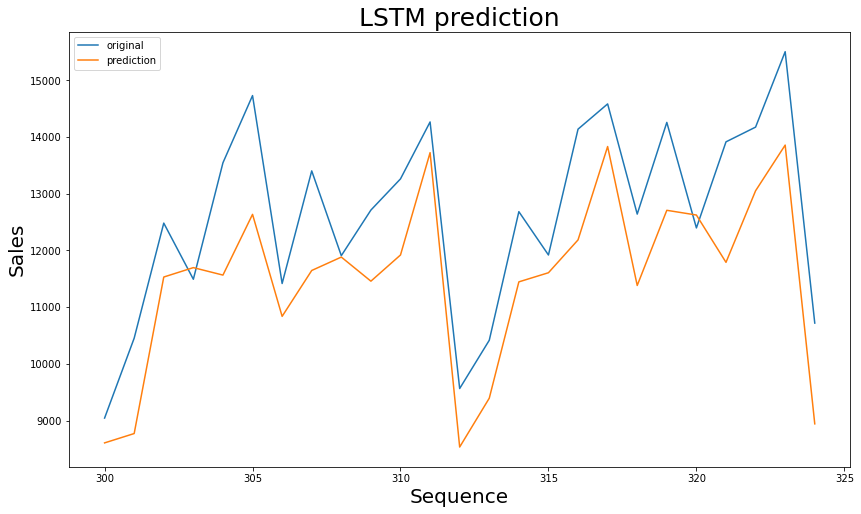

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 13ms/step - loss: 0.0901 - mae: 0.2638


[0.09013458341360092, 0.26380518078804016]